# Regression Plots

This Jupyter Notebook is part of the time travel distance project. In this notebook we visualise the results of the linear regression models.

## Import

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# read data
fit_combi = sm.load("models/fit_combi.pickle")
fit_vertic = sm.load("models/fit_vertic.pickle")
fit_horiz = sm.load("models/fit_horiz.pickle")
df = pd.read_csv('data/combined_data.csv')

## Only vertical model

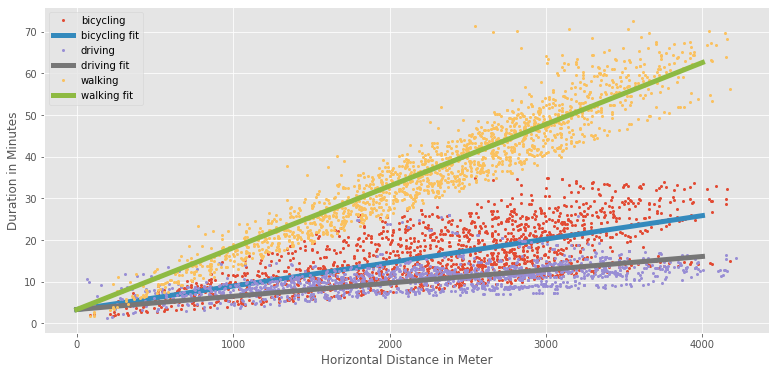

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_horizontal, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(0, 4000)
    if name == 'driving':
      y_hat = fit_horiz.params['Intercept'] + x * fit_horiz.params['distance_horizontal']

    elif name == 'bicycling':
      y_hat = fit_horiz.params['Intercept'] + x * fit_horiz.params['distance_horizontal'] + x * fit_horiz.params['distance_horizontal:isBicycling[T.True]']   

    else:
      y_hat = fit_horiz.params['Intercept'] + x * fit_horiz.params['distance_horizontal'] + x * fit_horiz.params['distance_horizontal:isBicycling[T.True]'] + x * fit_horiz.params['distance_horizontal:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Horizontal Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

## Only horizontal model

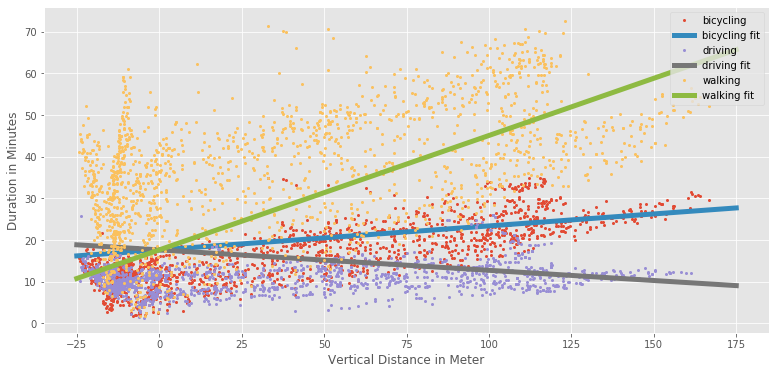

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_vertical, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(-25, 175)
    if name == 'driving':
      y_hat = fit_vertic.params['Intercept'] + x * fit_vertic.params['distance_vertical']

    elif name == 'bicycling':
      y_hat = fit_vertic.params['Intercept'] + x * fit_vertic.params['distance_vertical'] + x * fit_vertic.params['distance_vertical:isBicycling[T.True]']   

    else:
      y_hat = fit_vertic.params['Intercept'] + x * fit_vertic.params['distance_vertical'] + x * fit_vertic.params['distance_vertical:isBicycling[T.True]'] + x * fit_vertic.params['distance_vertical:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Vertical Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

## Horizontal + vertical model

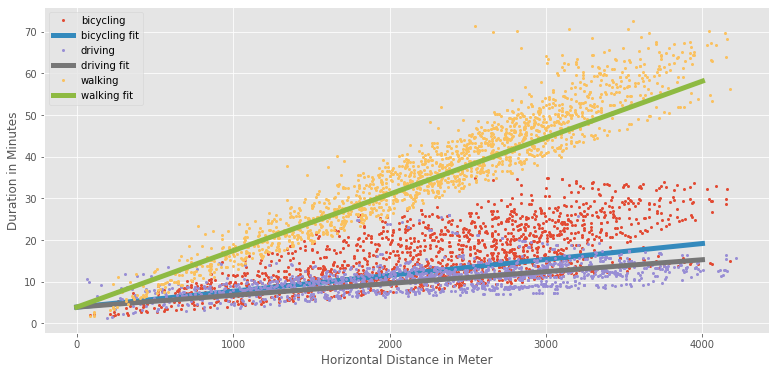

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_horizontal, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(0, 4000)
    if name == 'driving':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_horizontal']

    elif name == 'bicycling':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_horizontal'] + x * fit_combi.params['distance_horizontal:isBicycling[T.True]']   

    else:
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_horizontal'] + x * fit_combi.params['distance_horizontal:isBicycling[T.True]'] + x * fit_combi.params['distance_horizontal:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Horizontal Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

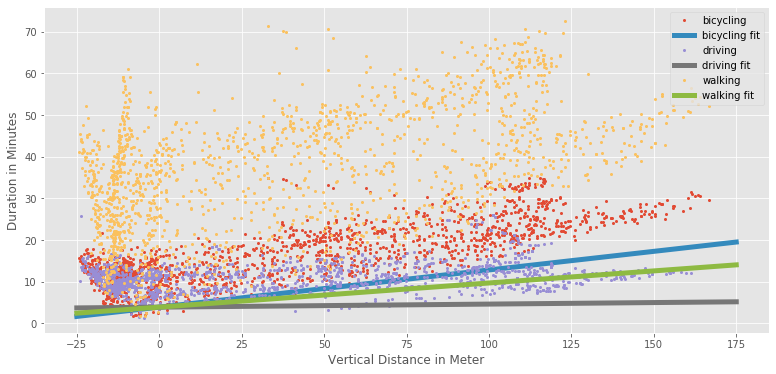

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_vertical, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(-25, 175)
    if name == 'driving':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_vertical']

    elif name == 'bicycling':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_vertical'] + x * fit_combi.params['distance_vertical:isBicycling[T.True]']   

    else:
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_vertical'] + x * fit_combi.params['distance_vertical:isBicycling[T.True]'] + x * fit_combi.params['distance_vertical:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Vertical Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

### 3D Plot

In [ ]:
# define grid of points
x = np.arange(-25, 150)
y = np.arange(0, 4000)
xv, yv = np.meshgrid(x, y)

# calculate regression planes
z_driving = fit_combi.params['Intercept'] + xv.flatten() * fit_combi.params['distance_vertical'] + yv.flatten() * fit_combi.params['distance_horizontal']
z_bicycle = z_driving + xv.flatten() * fit_combi.params['distance_vertical:isBicycling[T.True]'] + yv.flatten() * fit_combi.params['distance_horizontal:isBicycling[T.True]']    
z_walking = z_bicycle + xv.flatten() * fit_combi.params['distance_vertical:isWalking[T.True]'] + yv.flatten() * fit_combi.params['distance_horizontal:isWalking[T.True]']    

# reshape
z_bicycle = z_bicycle.reshape((y.shape[0], x.shape[0]))
z_driving = z_driving.reshape((y.shape[0], x.shape[0]))
z_walking = z_walking.reshape((y.shape[0], x.shape[0]))

In [ ]:
# plot
fig = px.scatter_3d(df, x='distance_vertical', y='distance_horizontal', z='duration',
              color='mode', width=1000, height=800)

# style
fig.update_traces(marker_size = 2)
yellow = [[0, '#FFDB58'], [1, '#FFDB58']]
blue = [[0, '#034efc'], [1, '#034efc']]
red = [[0, '#fc0330'], [1, '#fc0330']]

# add regression planes
fig.add_trace(go.Surface(x=x, y=y, z=z_driving, showscale=False, colorscale=yellow))
fig.add_trace(go.Surface(x=x, y=y, z=z_bicycle, showscale=False, colorscale=blue))
fig.add_trace(go.Surface(x=x, y=y, z=z_walking, showscale=False, colorscale=red))

fig.show()

## BIC comparison

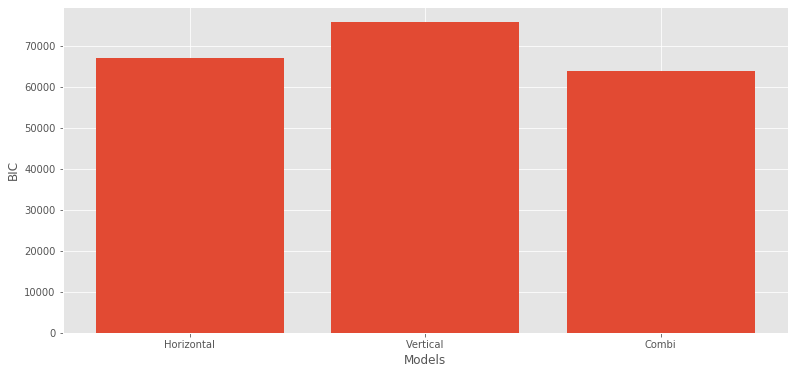

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

plt.bar(['Horizontal', 'Vertical', 'Combi'], [fit_horiz.bic, fit_vertic.bic,  fit_combi.bic])
plt.xlabel('Models')
plt.ylabel('BIC');